In [1]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

In [62]:
function TM(u, p, t)

    U(y) = U0 + ΔU0 / ( 1 + exp( -50*(y-ythr) ) )
    σ(x) = 1 / ( 1 + exp( -20*(x-xthr) ) )

    E, x, y = u
    α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0 = p

    du1 = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)

    return SVector(du1, du2, du3)
end

TM (generic function with 1 method)

In [63]:
t = 500.0
tt = 250.0
tstep = 0.001
trange = range(0.0, t, step = tstep);
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [64]:
const τ = 0.013; const τD = 0.15; const τy = 1.8; const J = 3.07; const β = 0.4375;
const α = 1.15; const U0 = 0.3;
const xthr = 0.9; const ythr = 0.4
const ΔU0 = 0.4
I0 = -1.509460;

In [65]:
p = [α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = [0.5287662926292962, 0.9611190233149197, 0.41838101329795496]

ds = ContinuousDynamicalSystem(TM, u0, p)

3-dimensional continuous dynamical system
 state:       [0.528766, 0.961119, 0.418381]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.15, 0.013, 0.15, 1.8, 3.07, …, 0.3, 0.4, 0.4375, -1.50946]

In [66]:
I0range = range( -1.509460, -1.509490, length = 15000 )

idx_control_parameter = 11

idx_fix = 2; fixed_value = 0.915
surface = (idx_fix, fixed_value)
setting_root = (xrtol = 1e-13, atol = 1e-13);

In [68]:
length(I0range)

15000

In [ ]:
idx_save = 1
output = produce_orbitdiagram(ds, surface, idx_save,
                        idx_control_parameter, I0range;
                        tfinal = t, Ttr = tt,
                        printparams = true,
                        diffeq = integ_set, rootkw = setting_root
                        );

parameter = -1.50946
parameter = -1.5094600020001334
parameter = -1.5094600040002666
parameter = -1.5094600060004
parameter = -1.5094600080005334
parameter = -1.5094600100006668
parameter = -1.5094600120008002
parameter = -1.5094600140009333
parameter = -1.5094600160010667
parameter = -1.5094600180012
parameter = -1.5094600200013335
parameter = -1.5094600220014667
parameter = -1.5094600240016
parameter = -1.5094600260017335
parameter = -1.5094600280018668
parameter = -1.5094600300020002
parameter = -1.5094600320021334
parameter = -1.5094600340022668
parameter = -1.5094600360024002
parameter = -1.5094600380025336
parameter = -1.5094600400026668
parameter = -1.5094600420028002
parameter = -1.5094600440029335
parameter = -1.509460046003067
parameter = -1.5094600480032
parameter = -1.5094600500033335
parameter = -1.509460052003467
parameter = -1.5094600540036003
parameter = -1.5094600560037337
parameter = -1.5094600580038668
parameter = -1.5094600600040002
parameter = -1.5094600620041336
p

parameter = -1.5094605160344023
parameter = -1.5094605180345357
parameter = -1.509460520034669
parameter = -1.5094605220348023
parameter = -1.5094605240349357
parameter = -1.509460526035069
parameter = -1.5094605280352023
parameter = -1.5094605300353356
parameter = -1.509460532035469
parameter = -1.5094605340356024
parameter = -1.5094605360357358
parameter = -1.509460538035869
parameter = -1.5094605400360024
parameter = -1.5094605420361358
parameter = -1.5094605440362692
parameter = -1.5094605460364023
parameter = -1.5094605480365357
parameter = -1.5094605500366691
parameter = -1.5094605520368025
parameter = -1.5094605540369357
parameter = -1.509460556037069
parameter = -1.5094605580372025
parameter = -1.5094605600373359
parameter = -1.5094605620374693
parameter = -1.5094605640376024
parameter = -1.5094605660377358
parameter = -1.5094605680378692
parameter = -1.5094605700380026
parameter = -1.5094605720381358
parameter = -1.5094605740382692
parameter = -1.5094605760384026
parameter = -

parameter = -1.5094610340689378
parameter = -1.5094610360690712
parameter = -1.5094610380692046
parameter = -1.509461040069338
parameter = -1.5094610420694714
parameter = -1.5094610440696046
parameter = -1.509461046069738
parameter = -1.5094610480698714
parameter = -1.5094610500700048
parameter = -1.509461052070138
parameter = -1.5094610540702713
parameter = -1.5094610560704047
parameter = -1.509461058070538
parameter = -1.5094610600706713
parameter = -1.5094610620708047
parameter = -1.509461064070938
parameter = -1.5094610660710714
parameter = -1.5094610680712048
parameter = -1.509461070071338
parameter = -1.5094610720714714
parameter = -1.5094610740716048
parameter = -1.5094610760717382
parameter = -1.5094610780718714
parameter = -1.5094610800720047
parameter = -1.5094610820721381
parameter = -1.5094610840722715
parameter = -1.509461086072405
parameter = -1.509461088072538
parameter = -1.5094610900726715
parameter = -1.5094610920728049
parameter = -1.5094610940729383
parameter = -1.5

parameter = -1.5094615521034735
parameter = -1.509461554103607
parameter = -1.5094615561037403
parameter = -1.5094615581038735
parameter = -1.509461560104007
parameter = -1.5094615621041403
parameter = -1.5094615641042737
parameter = -1.509461566104407
parameter = -1.5094615681045402
parameter = -1.5094615701046736
parameter = -1.509461572104807
parameter = -1.5094615741049404
parameter = -1.5094615761050736
parameter = -1.509461578105207
parameter = -1.5094615801053404
parameter = -1.5094615821054738
parameter = -1.509461584105607
parameter = -1.5094615861057403
parameter = -1.5094615881058737
parameter = -1.5094615901060071
parameter = -1.5094615921061405
parameter = -1.5094615941062737
parameter = -1.509461596106407
parameter = -1.5094615981065405
parameter = -1.5094616001066739
parameter = -1.509461602106807
parameter = -1.5094616041069404
parameter = -1.5094616061070738
parameter = -1.5094616081072072
parameter = -1.5094616101073406
parameter = -1.5094616121074738
parameter = -1.5

parameter = -1.5094620681378759
parameter = -1.5094620701380093
parameter = -1.5094620721381427
parameter = -1.5094620741382758
parameter = -1.5094620761384092
parameter = -1.5094620781385426
parameter = -1.509462080138676
parameter = -1.5094620821388092
parameter = -1.5094620841389426
parameter = -1.509462086139076
parameter = -1.5094620881392093
parameter = -1.5094620901393425
parameter = -1.509462092139476
parameter = -1.5094620941396093
parameter = -1.5094620961397427
parameter = -1.509462098139876
parameter = -1.5094621001400093
parameter = -1.5094621021401426
parameter = -1.509462104140276
parameter = -1.5094621061404094
parameter = -1.5094621081405426
parameter = -1.509462110140676
parameter = -1.5094621121408094
parameter = -1.5094621141409428
parameter = -1.5094621161410762
parameter = -1.5094621181412093
parameter = -1.5094621201413427
parameter = -1.5094621221414761
parameter = -1.5094621241416095
parameter = -1.5094621261417427
parameter = -1.509462128141876
parameter = -1.

parameter = -1.5094625861724116
parameter = -1.5094625881725448
parameter = -1.5094625901726781
parameter = -1.5094625921728115
parameter = -1.509462594172945
parameter = -1.509462596173078
parameter = -1.5094625981732115
parameter = -1.5094626001733449
parameter = -1.5094626021734783
parameter = -1.5094626041736117
parameter = -1.5094626061737448
parameter = -1.5094626081738782
parameter = -1.5094626101740116
parameter = -1.509462612174145
parameter = -1.5094626141742782
parameter = -1.5094626161744116
parameter = -1.509462618174545
parameter = -1.5094626201746784
parameter = -1.5094626221748118
parameter = -1.509462624174945
parameter = -1.5094626261750783
parameter = -1.5094626281752117
parameter = -1.509462630175345
parameter = -1.5094626321754783
parameter = -1.5094626341756117
parameter = -1.509462636175745
parameter = -1.5094626381758784
parameter = -1.5094626401760118
parameter = -1.509462642176145
parameter = -1.5094626441762784
parameter = -1.5094626461764118
parameter = -1.5

parameter = -1.509463104206947
parameter = -1.5094631062070805
parameter = -1.5094631082072139
parameter = -1.5094631102073472
parameter = -1.5094631122074804
parameter = -1.5094631142076138
parameter = -1.5094631162077472
parameter = -1.5094631182078806
parameter = -1.5094631202080138
parameter = -1.5094631222081472
parameter = -1.5094631242082805
parameter = -1.509463126208414
parameter = -1.5094631282085473
parameter = -1.5094631302086805
parameter = -1.509463132208814
parameter = -1.5094631342089473
parameter = -1.5094631362090807
parameter = -1.5094631382092139
parameter = -1.5094631402093472
parameter = -1.5094631422094806
parameter = -1.509463144209614
parameter = -1.5094631462097474
parameter = -1.5094631482098806
parameter = -1.509463150210014
parameter = -1.5094631522101474
parameter = -1.5094631542102808
parameter = -1.509463156210414
parameter = -1.5094631582105473
parameter = -1.5094631602106807
parameter = -1.5094631622108141
parameter = -1.5094631642109475
parameter = -1

parameter = -1.509463618241216
parameter = -1.5094636202413494
parameter = -1.5094636222414828
parameter = -1.5094636242416162
parameter = -1.5094636262417493
parameter = -1.5094636282418827
parameter = -1.5094636302420161
parameter = -1.5094636322421495
parameter = -1.509463634242283
parameter = -1.509463636242416
parameter = -1.5094636382425495
parameter = -1.5094636402426829
parameter = -1.5094636422428163
parameter = -1.5094636442429494
parameter = -1.5094636462430828
parameter = -1.5094636482432162
parameter = -1.5094636502433496
parameter = -1.509463652243483
parameter = -1.5094636542436162
parameter = -1.5094636562437496
parameter = -1.509463658243883
parameter = -1.5094636602440163
parameter = -1.5094636622441495
parameter = -1.509463664244283
parameter = -1.5094636662444163
parameter = -1.5094636682445497
parameter = -1.509463670244683
parameter = -1.5094636722448163
parameter = -1.5094636742449496
parameter = -1.509463676245083
parameter = -1.5094636782452164
parameter = -1.5

parameter = -1.5094641362757517
parameter = -1.509464138275885
parameter = -1.5094641402760185
parameter = -1.5094641422761517
parameter = -1.509464144276285
parameter = -1.5094641462764185
parameter = -1.5094641482765518
parameter = -1.509464150276685
parameter = -1.5094641522768184
parameter = -1.5094641542769518
parameter = -1.5094641562770852
parameter = -1.5094641582772186
parameter = -1.5094641602773518
parameter = -1.5094641622774851
parameter = -1.5094641642776185
parameter = -1.509464166277752
parameter = -1.509464168277885
parameter = -1.5094641702780185
parameter = -1.5094641722781519
parameter = -1.5094641742782853
parameter = -1.5094641762784187
parameter = -1.5094641782785518
parameter = -1.5094641802786852
parameter = -1.5094641822788186
parameter = -1.509464184278952
parameter = -1.5094641862790852
parameter = -1.5094641882792186
parameter = -1.509464190279352
parameter = -1.5094641922794854
parameter = -1.5094641942796185
parameter = -1.509464196279752
parameter = -1.5

parameter = -1.5094646543102874
parameter = -1.5094646563104206
parameter = -1.509464658310554
parameter = -1.5094646603106874
parameter = -1.5094646623108208
parameter = -1.5094646643109542
parameter = -1.5094646663110873
parameter = -1.5094646683112207
parameter = -1.5094646703113541
parameter = -1.5094646723114875
parameter = -1.5094646743116207
parameter = -1.509464676311754
parameter = -1.5094646783118875
parameter = -1.5094646803120209
parameter = -1.5094646823121542
parameter = -1.5094646843122874
parameter = -1.5094646863124208
parameter = -1.5094646883125542
parameter = -1.5094646903126876
parameter = -1.5094646923128208
parameter = -1.5094646943129542
parameter = -1.5094646963130876
parameter = -1.509464698313221
parameter = -1.5094647003133541
parameter = -1.5094647023134875
parameter = -1.509464704313621
parameter = -1.5094647063137543
parameter = -1.5094647083138877
parameter = -1.5094647103140209
parameter = -1.5094647123141542
parameter = -1.5094647143142876
parameter = 

parameter = -1.5094651703446897
parameter = -1.509465172344823
parameter = -1.5094651743449563
parameter = -1.5094651763450897
parameter = -1.509465178345223
parameter = -1.5094651803453563
parameter = -1.5094651823454897
parameter = -1.509465184345623
parameter = -1.5094651863457564
parameter = -1.5094651883458898
parameter = -1.509465190346023
parameter = -1.5094651923461564
parameter = -1.5094651943462898
parameter = -1.5094651963464232
parameter = -1.5094651983465563
parameter = -1.5094652003466897
parameter = -1.5094652023468231
parameter = -1.5094652043469565
parameter = -1.50946520634709
parameter = -1.509465208347223
parameter = -1.5094652103473565
parameter = -1.5094652123474899
parameter = -1.5094652143476233
parameter = -1.5094652163477564
parameter = -1.5094652183478898
parameter = -1.5094652203480232
parameter = -1.5094652223481566
parameter = -1.5094652243482898
parameter = -1.5094652263484232
parameter = -1.5094652283485566
parameter = -1.50946523034869
parameter = -1.50

parameter = -1.5094656863790918
parameter = -1.5094656883792252
parameter = -1.5094656903793586
parameter = -1.509465692379492
parameter = -1.5094656943796254
parameter = -1.5094656963797586
parameter = -1.509465698379892
parameter = -1.5094657003800254
parameter = -1.5094657023801588
parameter = -1.509465704380292
parameter = -1.5094657063804253
parameter = -1.5094657083805587
parameter = -1.509465710380692
parameter = -1.5094657123808255
parameter = -1.5094657143809587
parameter = -1.509465716381092
parameter = -1.5094657183812255
parameter = -1.5094657203813588
parameter = -1.509465722381492
parameter = -1.5094657243816254
parameter = -1.5094657263817588
parameter = -1.5094657283818922
parameter = -1.5094657303820254
parameter = -1.5094657323821588
parameter = -1.5094657343822921
parameter = -1.5094657363824255
parameter = -1.509465738382559
parameter = -1.509465740382692
parameter = -1.5094657423828255
parameter = -1.5094657443829589
parameter = -1.5094657463830923
parameter = -1.5

parameter = -1.5094662024134942
parameter = -1.5094662044136276
parameter = -1.509466206413761
parameter = -1.5094662084138943
parameter = -1.5094662104140275
parameter = -1.509466212414161
parameter = -1.5094662144142943
parameter = -1.5094662164144277
parameter = -1.509466218414561
parameter = -1.5094662204146942
parameter = -1.5094662224148276
parameter = -1.509466224414961
parameter = -1.5094662264150944
parameter = -1.5094662284152276
parameter = -1.509466230415361
parameter = -1.5094662324154944
parameter = -1.5094662344156278
parameter = -1.509466236415761
parameter = -1.5094662384158943
parameter = -1.5094662404160277
parameter = -1.5094662424161611
parameter = -1.5094662444162945
parameter = -1.5094662464164277
parameter = -1.509466248416561
parameter = -1.5094662504166945
parameter = -1.5094662524168279
parameter = -1.509466254416961
parameter = -1.5094662564170944
parameter = -1.5094662584172278
parameter = -1.5094662604173612
parameter = -1.5094662624174946
parameter = -1.5

parameter = -1.5094667184478965
parameter = -1.5094667204480299
parameter = -1.5094667224481633
parameter = -1.5094667244482967
parameter = -1.5094667264484298
parameter = -1.5094667284485632
parameter = -1.5094667304486966
parameter = -1.50946673244883
parameter = -1.5094667344489632
parameter = -1.5094667364490966
parameter = -1.50946673844923
parameter = -1.5094667404493634
parameter = -1.5094667424494965
parameter = -1.50946674444963
parameter = -1.5094667464497633
parameter = -1.5094667484498967
parameter = -1.50946675045003
parameter = -1.5094667524501633
parameter = -1.5094667544502967
parameter = -1.50946675645043
parameter = -1.5094667584505634
parameter = -1.5094667604506966
parameter = -1.50946676245083
parameter = -1.5094667644509634
parameter = -1.5094667664510968
parameter = -1.5094667684512302
parameter = -1.5094667704513633
parameter = -1.5094667724514967
parameter = -1.5094667744516301
parameter = -1.5094667764517635
parameter = -1.5094667784518967
parameter = -1.50946

parameter = -1.5094672344822988
parameter = -1.5094672364824322
parameter = -1.5094672384825656
parameter = -1.5094672404826988
parameter = -1.5094672424828321
parameter = -1.5094672444829655
parameter = -1.509467246483099
parameter = -1.509467248483232
parameter = -1.5094672504833655
parameter = -1.509467252483499
parameter = -1.5094672544836323
parameter = -1.5094672564837657
parameter = -1.5094672584838988
parameter = -1.5094672604840322
parameter = -1.5094672624841656
parameter = -1.509467264484299
parameter = -1.5094672664844322
parameter = -1.5094672684845656
parameter = -1.509467270484699
parameter = -1.5094672724848324
parameter = -1.5094672744849658
parameter = -1.509467276485099
parameter = -1.5094672784852323
parameter = -1.5094672804853657
parameter = -1.509467282485499
parameter = -1.5094672844856323
parameter = -1.5094672864857657
parameter = -1.509467288485899
parameter = -1.5094672904860325
parameter = -1.5094672924861658
parameter = -1.509467294486299
parameter = -1.50

parameter = -1.5094677525168345
parameter = -1.509467754516968
parameter = -1.509467756517101
parameter = -1.5094677585172345
parameter = -1.5094677605173679
parameter = -1.5094677625175013
parameter = -1.5094677645176344
parameter = -1.5094677665177678
parameter = -1.5094677685179012
parameter = -1.5094677705180346
parameter = -1.5094677725181678
parameter = -1.5094677745183012
parameter = -1.5094677765184346
parameter = -1.509467778518568
parameter = -1.5094677805187013
parameter = -1.5094677825188345
parameter = -1.509467784518968
parameter = -1.5094677865191013
parameter = -1.5094677885192347
parameter = -1.5094677905193679
parameter = -1.5094677925195013
parameter = -1.5094677945196346
parameter = -1.509467796519768
parameter = -1.5094677985199014
parameter = -1.5094678005200346
parameter = -1.509467802520168
parameter = -1.5094678045203014
parameter = -1.5094678065204348
parameter = -1.509467808520568
parameter = -1.5094678105207013
parameter = -1.5094678125208347
parameter = -1.

parameter = -1.5094682665511034
parameter = -1.5094682685512368
parameter = -1.50946827055137
parameter = -1.5094682725515034
parameter = -1.5094682745516368
parameter = -1.5094682765517702
parameter = -1.5094682785519034
parameter = -1.5094682805520367
parameter = -1.5094682825521701
parameter = -1.5094682845523035
parameter = -1.509468286552437
parameter = -1.50946828855257
parameter = -1.5094682905527035
parameter = -1.5094682925528369
parameter = -1.5094682945529703
parameter = -1.5094682965531034
parameter = -1.5094682985532368
parameter = -1.5094683005533702
parameter = -1.5094683025535036
parameter = -1.509468304553637
parameter = -1.5094683065537702
parameter = -1.5094683085539036
parameter = -1.509468310554037
parameter = -1.5094683125541704
parameter = -1.5094683145543035
parameter = -1.509468316554437
parameter = -1.5094683185545703
parameter = -1.5094683205547037
parameter = -1.509468322554837
parameter = -1.5094683245549703
parameter = -1.5094683265551037
parameter = -1.50

parameter = -1.5094687825855058
parameter = -1.509468784585639
parameter = -1.5094687865857723
parameter = -1.5094687885859057
parameter = -1.509468790586039
parameter = -1.5094687925861725
parameter = -1.5094687945863057
parameter = -1.509468796586439
parameter = -1.5094687985865725
parameter = -1.5094688005867059
parameter = -1.509468802586839
parameter = -1.5094688045869724
parameter = -1.5094688065871058
parameter = -1.5094688085872392
parameter = -1.5094688105873726
parameter = -1.5094688125875058
parameter = -1.5094688145876392
parameter = -1.5094688165877725
parameter = -1.509468818587906
parameter = -1.509468820588039
parameter = -1.5094688225881725
parameter = -1.509468824588306
parameter = -1.5094688265884393
parameter = -1.5094688285885727
parameter = -1.5094688305887058
parameter = -1.5094688325888392
parameter = -1.5094688345889726
parameter = -1.509468836589106
parameter = -1.5094688385892392
parameter = -1.5094688405893726
parameter = -1.509468842589506
parameter = -1.50

parameter = -1.509469298619908
parameter = -1.5094693006200413
parameter = -1.5094693026201746
parameter = -1.509469304620308
parameter = -1.5094693066204414
parameter = -1.5094693086205746
parameter = -1.509469310620708
parameter = -1.5094693126208414
parameter = -1.5094693146209748
parameter = -1.5094693166211082
parameter = -1.5094693186212413
parameter = -1.5094693206213747
parameter = -1.5094693226215081
parameter = -1.5094693246216415
parameter = -1.5094693266217747
parameter = -1.509469328621908
parameter = -1.5094693306220415
parameter = -1.5094693326221749
parameter = -1.5094693346223083
parameter = -1.5094693366224414
parameter = -1.5094693386225748
parameter = -1.5094693406227082
parameter = -1.5094693426228416
parameter = -1.5094693446229748
parameter = -1.5094693466231082
parameter = -1.5094693486232416
parameter = -1.509469350623375
parameter = -1.5094693526235083
parameter = -1.5094693546236415
parameter = -1.509469356623775
parameter = -1.5094693586239083
parameter = -1

parameter = -1.5094698146543102
parameter = -1.5094698166544436
parameter = -1.509469818654577
parameter = -1.5094698206547104
parameter = -1.5094698226548438
parameter = -1.509469824654977
parameter = -1.5094698266551103
parameter = -1.5094698286552437
parameter = -1.509469830655377
parameter = -1.5094698326555103
parameter = -1.5094698346556437
parameter = -1.509469836655777
parameter = -1.5094698386559104
parameter = -1.5094698406560438
parameter = -1.509469842656177
parameter = -1.5094698446563104
parameter = -1.5094698466564438
parameter = -1.5094698486565772
parameter = -1.5094698506567104
parameter = -1.5094698526568437
parameter = -1.5094698546569771
parameter = -1.5094698566571105
parameter = -1.509469858657244
parameter = -1.509469860657377
parameter = -1.5094698626575105
parameter = -1.5094698646576439
parameter = -1.5094698666577773
parameter = -1.5094698686579104
parameter = -1.5094698706580438
parameter = -1.5094698726581772
parameter = -1.5094698746583106
parameter = -1.

parameter = -1.5094703306887125
parameter = -1.509470332688846
parameter = -1.5094703346889793
parameter = -1.5094703366891127
parameter = -1.5094703386892458
parameter = -1.5094703406893792
parameter = -1.5094703426895126
parameter = -1.509470344689646
parameter = -1.5094703466897794
parameter = -1.5094703486899126
parameter = -1.509470350690046
parameter = -1.5094703526901794
parameter = -1.5094703546903128
parameter = -1.509470356690446
parameter = -1.5094703586905793
parameter = -1.5094703606907127
parameter = -1.5094703626908461
parameter = -1.5094703646909795
parameter = -1.5094703666911127
parameter = -1.509470368691246
parameter = -1.5094703706913795
parameter = -1.5094703726915129
parameter = -1.509470374691646
parameter = -1.5094703766917794
parameter = -1.5094703786919128
parameter = -1.5094703806920462
parameter = -1.5094703826921794
parameter = -1.5094703846923128
parameter = -1.5094703866924462
parameter = -1.5094703886925795
parameter = -1.509470390692713
parameter = -1.

parameter = -1.5094708487232482
parameter = -1.5094708507233816
parameter = -1.509470852723515
parameter = -1.5094708547236482
parameter = -1.5094708567237816
parameter = -1.509470858723915
parameter = -1.5094708607240483
parameter = -1.5094708627241815
parameter = -1.509470864724315
parameter = -1.5094708667244483
parameter = -1.5094708687245817
parameter = -1.509470870724715
parameter = -1.5094708727248483
parameter = -1.5094708747249816
parameter = -1.509470876725115
parameter = -1.5094708787252484
parameter = -1.5094708807253816
parameter = -1.509470882725515
parameter = -1.5094708847256484
parameter = -1.5094708867257818
parameter = -1.5094708887259152
parameter = -1.5094708907260483
parameter = -1.5094708927261817
parameter = -1.5094708947263151
parameter = -1.5094708967264485
parameter = -1.5094708987265817
parameter = -1.509470900726715
parameter = -1.5094709027268485
parameter = -1.5094709047269819
parameter = -1.509470906727115
parameter = -1.5094709087272484
parameter = -1.5

parameter = -1.5094713647576505
parameter = -1.509471366757784
parameter = -1.509471368757917
parameter = -1.5094713707580505
parameter = -1.5094713727581839
parameter = -1.5094713747583173
parameter = -1.5094713767584507
parameter = -1.5094713787585838
parameter = -1.5094713807587172
parameter = -1.5094713827588506
parameter = -1.509471384758984
parameter = -1.5094713867591172
parameter = -1.5094713887592506
parameter = -1.509471390759384
parameter = -1.5094713927595174
parameter = -1.5094713947596508
parameter = -1.509471396759784
parameter = -1.5094713987599173
parameter = -1.5094714007600507
parameter = -1.509471402760184
parameter = -1.5094714047603173
parameter = -1.5094714067604507
parameter = -1.509471408760584
parameter = -1.5094714107607174
parameter = -1.5094714127608506
parameter = -1.509471414760984
parameter = -1.5094714167611174
parameter = -1.5094714187612508
parameter = -1.5094714207613842
parameter = -1.5094714227615174
parameter = -1.5094714247616507
parameter = -1.5

parameter = -1.5094718787919195
parameter = -1.5094718807920529
parameter = -1.5094718827921862
parameter = -1.5094718847923194
parameter = -1.5094718867924528
parameter = -1.5094718887925862
parameter = -1.5094718907927196
parameter = -1.5094718927928528
parameter = -1.5094718947929862
parameter = -1.5094718967931195
parameter = -1.509471898793253
parameter = -1.5094719007933863
parameter = -1.5094719027935195
parameter = -1.509471904793653
parameter = -1.5094719067937863
parameter = -1.5094719087939197
parameter = -1.5094719107940529
parameter = -1.5094719127941862
parameter = -1.5094719147943196
parameter = -1.509471916794453
parameter = -1.5094719187945862
parameter = -1.5094719207947196
parameter = -1.509471922794853
parameter = -1.5094719247949864
parameter = -1.5094719267951198
parameter = -1.509471928795253
parameter = -1.5094719307953863
parameter = -1.5094719327955197
parameter = -1.5094719347956531
parameter = -1.5094719367957863
parameter = -1.5094719387959197
parameter = -

parameter = -1.5094723948263218
parameter = -1.5094723968264552
parameter = -1.5094723988265883
parameter = -1.5094724008267217
parameter = -1.5094724028268551
parameter = -1.5094724048269885
parameter = -1.509472406827122
parameter = -1.509472408827255
parameter = -1.5094724108273885
parameter = -1.5094724128275219
parameter = -1.5094724148276553
parameter = -1.5094724168277884
parameter = -1.5094724188279218
parameter = -1.5094724208280552
parameter = -1.5094724228281886
parameter = -1.5094724248283218
parameter = -1.5094724268284552
parameter = -1.5094724288285886
parameter = -1.509472430828722
parameter = -1.5094724328288553
parameter = -1.5094724348289885
parameter = -1.509472436829122
parameter = -1.5094724388292553
parameter = -1.5094724408293887
parameter = -1.5094724428295219
parameter = -1.5094724448296553
parameter = -1.5094724468297886
parameter = -1.509472448829922
parameter = -1.5094724508300554
parameter = -1.5094724528301886
parameter = -1.509472454830322
parameter = -1

parameter = -1.5094729128608575
parameter = -1.5094729148609907
parameter = -1.509472916861124
parameter = -1.5094729188612575
parameter = -1.5094729208613908
parameter = -1.509472922861524
parameter = -1.5094729248616574
parameter = -1.5094729268617908
parameter = -1.5094729288619242
parameter = -1.5094729308620574
parameter = -1.5094729328621908
parameter = -1.5094729348623241
parameter = -1.5094729368624575
parameter = -1.509472938862591
parameter = -1.509472940862724
parameter = -1.5094729428628575
parameter = -1.5094729448629909
parameter = -1.5094729468631243
parameter = -1.5094729488632574
parameter = -1.5094729508633908
parameter = -1.5094729528635242
parameter = -1.5094729548636576
parameter = -1.509472956863791
parameter = -1.5094729588639242
parameter = -1.5094729608640576
parameter = -1.509472962864191
parameter = -1.5094729648643244
parameter = -1.5094729668644575
parameter = -1.509472968864591
parameter = -1.5094729708647243
parameter = -1.5094729728648577
parameter = -1.

parameter = -1.5094734288952596
parameter = -1.509473430895393
parameter = -1.5094734328955264
parameter = -1.5094734348956598
parameter = -1.5094734368957932
parameter = -1.5094734388959263
parameter = -1.5094734408960597
parameter = -1.5094734428961931
parameter = -1.5094734448963265
parameter = -1.5094734468964597
parameter = -1.509473448896593
parameter = -1.5094734508967265
parameter = -1.5094734528968599
parameter = -1.509473454896993
parameter = -1.5094734568971264
parameter = -1.5094734588972598
parameter = -1.5094734608973932
parameter = -1.5094734628975266
parameter = -1.5094734648976598
parameter = -1.5094734668977932
parameter = -1.5094734688979266
parameter = -1.50947347089806
parameter = -1.5094734728981931
parameter = -1.5094734748983265
parameter = -1.50947347689846
parameter = -1.5094734788985933
parameter = -1.5094734808987267
parameter = -1.5094734828988599
parameter = -1.5094734848989932
parameter = -1.5094734868991266
parameter = -1.50947348889926
parameter = -1.50

parameter = -1.509473944929662
parameter = -1.5094739469297953
parameter = -1.5094739489299287
parameter = -1.509473950930062
parameter = -1.5094739529301953
parameter = -1.5094739549303287
parameter = -1.509473956930462
parameter = -1.5094739589305954
parameter = -1.5094739609307286
parameter = -1.509473962930862
parameter = -1.5094739649309954
parameter = -1.5094739669311288
parameter = -1.5094739689312622
parameter = -1.5094739709313953
parameter = -1.5094739729315287
parameter = -1.5094739749316621
parameter = -1.5094739769317955
parameter = -1.5094739789319287
parameter = -1.509473980932062
parameter = -1.5094739829321955
parameter = -1.5094739849323289
parameter = -1.5094739869324623
parameter = -1.5094739889325954
parameter = -1.5094739909327288
parameter = -1.5094739929328622
parameter = -1.5094739949329956
parameter = -1.5094739969331288
parameter = -1.5094739989332622
parameter = -1.5094740009333956
parameter = -1.509474002933529
parameter = -1.5094740049336623
parameter = -1

parameter = -1.5094744629641976
parameter = -1.509474464964331
parameter = -1.5094744669644642
parameter = -1.5094744689645976
parameter = -1.509474470964731
parameter = -1.5094744729648644
parameter = -1.5094744749649978
parameter = -1.509474476965131
parameter = -1.5094744789652643
parameter = -1.5094744809653977
parameter = -1.509474482965531
parameter = -1.5094744849656643
parameter = -1.5094744869657977
parameter = -1.509474488965931
parameter = -1.5094744909660645
parameter = -1.5094744929661978
parameter = -1.509474494966331
parameter = -1.5094744969664644
parameter = -1.5094744989665978
parameter = -1.5094745009667312
parameter = -1.5094745029668644
parameter = -1.5094745049669978
parameter = -1.5094745069671311
parameter = -1.5094745089672645
parameter = -1.509474510967398
parameter = -1.509474512967531
parameter = -1.5094745149676645
parameter = -1.5094745169677979
parameter = -1.5094745189679313
parameter = -1.5094745209680644
parameter = -1.5094745229681978
parameter = -1.5

parameter = -1.5094749769984666
parameter = -1.5094749789986
parameter = -1.5094749809987333
parameter = -1.5094749829988665
parameter = -1.509474984999
parameter = -1.5094749869991333
parameter = -1.5094749889992667
parameter = -1.5094749909993999
parameter = -1.5094749929995332
parameter = -1.5094749949996666
parameter = -1.5094749969998
parameter = -1.5094749989999334
parameter = -1.5094750010000666
parameter = -1.5094750030002
parameter = -1.5094750050003334
parameter = -1.5094750070004668
parameter = -1.5094750090006
parameter = -1.5094750110007333
parameter = -1.5094750130008667
parameter = -1.5094750150010001
parameter = -1.5094750170011335
parameter = -1.5094750190012667
parameter = -1.5094750210014
parameter = -1.5094750230015335
parameter = -1.5094750250016669
parameter = -1.5094750270018
parameter = -1.5094750290019334
parameter = -1.5094750310020668
parameter = -1.5094750330022002
parameter = -1.5094750350023336
parameter = -1.5094750370024668
parameter = -1.509475039002600

parameter = -1.5094754950330023
parameter = -1.5094754970331354
parameter = -1.5094754990332688
parameter = -1.5094755010334022
parameter = -1.5094755030335356
parameter = -1.509475505033669
parameter = -1.5094755070338022
parameter = -1.5094755090339356
parameter = -1.509475511034069
parameter = -1.5094755130342024
parameter = -1.5094755150343355
parameter = -1.509475517034469
parameter = -1.5094755190346023
parameter = -1.5094755210347357
parameter = -1.509475523034869
parameter = -1.5094755250350023
parameter = -1.5094755270351357
parameter = -1.509475529035269
parameter = -1.5094755310354024
parameter = -1.5094755330355356
parameter = -1.509475535035669
parameter = -1.5094755370358024
parameter = -1.5094755390359358
parameter = -1.5094755410360692
parameter = -1.5094755430362023
parameter = -1.5094755450363357
parameter = -1.5094755470364691
parameter = -1.5094755490366025
parameter = -1.5094755510367357
parameter = -1.509475553036869
parameter = -1.5094755550370025
parameter = -1.

parameter = -1.5094760130675378
parameter = -1.5094760150676712
parameter = -1.5094760170678045
parameter = -1.509476019067938
parameter = -1.509476021068071
parameter = -1.5094760230682045
parameter = -1.509476025068338
parameter = -1.5094760270684713
parameter = -1.5094760290686047
parameter = -1.5094760310687378
parameter = -1.5094760330688712
parameter = -1.5094760350690046
parameter = -1.509476037069138
parameter = -1.5094760390692712
parameter = -1.5094760410694046
parameter = -1.509476043069538
parameter = -1.5094760450696714
parameter = -1.5094760470698048
parameter = -1.509476049069938
parameter = -1.5094760510700713
parameter = -1.5094760530702047
parameter = -1.509476055070338
parameter = -1.5094760570704713
parameter = -1.5094760590706047
parameter = -1.509476061070738
parameter = -1.5094760630708715
parameter = -1.5094760650710046
parameter = -1.509476067071138
parameter = -1.5094760690712714
parameter = -1.5094760710714048
parameter = -1.5094760730715382
parameter = -1.50

parameter = -1.50947652910194
parameter = -1.5094765311020735
parameter = -1.5094765331022069
parameter = -1.5094765351023403
parameter = -1.5094765371024734
parameter = -1.5094765391026068
parameter = -1.5094765411027402
parameter = -1.5094765431028736
parameter = -1.5094765451030068
parameter = -1.5094765471031402
parameter = -1.5094765491032736
parameter = -1.509476551103407
parameter = -1.5094765531035403
parameter = -1.5094765551036735
parameter = -1.509476557103807
parameter = -1.5094765591039403
parameter = -1.5094765611040737
parameter = -1.5094765631042069
parameter = -1.5094765651043403
parameter = -1.5094765671044736
parameter = -1.509476569104607
parameter = -1.5094765711047402
parameter = -1.5094765731048736
parameter = -1.509476575105007
parameter = -1.5094765771051404
parameter = -1.5094765791052738
parameter = -1.509476581105407
parameter = -1.5094765831055403
parameter = -1.5094765851056737
parameter = -1.5094765871058071
parameter = -1.5094765891059403
parameter = -1.

parameter = -1.509477043136209
parameter = -1.5094770451363424
parameter = -1.5094770471364758
parameter = -1.5094770491366092
parameter = -1.5094770511367424
parameter = -1.5094770531368757
parameter = -1.5094770551370091
parameter = -1.5094770571371425
parameter = -1.509477059137276
parameter = -1.509477061137409
parameter = -1.5094770631375425
parameter = -1.5094770651376759
parameter = -1.5094770671378093
parameter = -1.5094770691379424
parameter = -1.5094770711380758
parameter = -1.5094770731382092
parameter = -1.5094770751383426
parameter = -1.509477077138476
parameter = -1.5094770791386092
parameter = -1.5094770811387426
parameter = -1.509477083138876
parameter = -1.5094770851390094
parameter = -1.5094770871391425
parameter = -1.509477089139276
parameter = -1.5094770911394093
parameter = -1.5094770931395427
parameter = -1.5094770951396759
parameter = -1.5094770971398093
parameter = -1.5094770991399427
parameter = -1.509477101140076
parameter = -1.5094771031402094
parameter = -1.

parameter = -1.5094775591706113
parameter = -1.5094775611707447
parameter = -1.5094775631708781
parameter = -1.5094775651710115
parameter = -1.5094775671711447
parameter = -1.509477569171278
parameter = -1.5094775711714115
parameter = -1.5094775731715449
parameter = -1.509477575171678
parameter = -1.5094775771718114
parameter = -1.5094775791719448
parameter = -1.5094775811720782
parameter = -1.5094775831722116
parameter = -1.5094775851723448
parameter = -1.5094775871724782
parameter = -1.5094775891726115
parameter = -1.509477591172745
parameter = -1.509477593172878
parameter = -1.5094775951730115
parameter = -1.509477597173145
parameter = -1.5094775991732783
parameter = -1.5094776011734115
parameter = -1.5094776031735448
parameter = -1.5094776051736782
parameter = -1.5094776071738116
parameter = -1.509477609173945
parameter = -1.5094776111740782
parameter = -1.5094776131742116
parameter = -1.509477615174345
parameter = -1.5094776171744784
parameter = -1.5094776191746115
parameter = -1.

parameter = -1.5094780752050136
parameter = -1.509478077205147
parameter = -1.5094780792052804
parameter = -1.5094780812054136
parameter = -1.509478083205547
parameter = -1.5094780852056804
parameter = -1.5094780872058138
parameter = -1.5094780892059472
parameter = -1.5094780912060803
parameter = -1.5094780932062137
parameter = -1.5094780952063471
parameter = -1.5094780972064805
parameter = -1.5094780992066137
parameter = -1.509478101206747
parameter = -1.5094781032068805
parameter = -1.5094781052070139
parameter = -1.509478107207147
parameter = -1.5094781092072804
parameter = -1.5094781112074138
parameter = -1.5094781132075472
parameter = -1.5094781152076806
parameter = -1.5094781172078138
parameter = -1.5094781192079472
parameter = -1.5094781212080806
parameter = -1.509478123208214
parameter = -1.5094781252083471
parameter = -1.5094781272084805
parameter = -1.509478129208614
parameter = -1.5094781312087473
parameter = -1.5094781332088807
parameter = -1.5094781352090139
parameter = -1

parameter = -1.5094785892392826
parameter = -1.509478591239416
parameter = -1.5094785932395494
parameter = -1.5094785952396828
parameter = -1.509478597239816
parameter = -1.5094785992399493
parameter = -1.5094786012400827
parameter = -1.509478603240216
parameter = -1.5094786052403493
parameter = -1.5094786072404827
parameter = -1.509478609240616
parameter = -1.5094786112407494
parameter = -1.5094786132408826
parameter = -1.509478615241016
parameter = -1.5094786172411494
parameter = -1.5094786192412828
parameter = -1.5094786212414162
parameter = -1.5094786232415494
parameter = -1.5094786252416827
parameter = -1.5094786272418161
parameter = -1.5094786292419495
parameter = -1.5094786312420827
parameter = -1.509478633242216
parameter = -1.5094786352423495
parameter = -1.5094786372424829
parameter = -1.5094786392426163
parameter = -1.5094786412427494
parameter = -1.5094786432428828
parameter = -1.5094786452430162
parameter = -1.5094786472431496
parameter = -1.5094786492432828
parameter = -1

parameter = -1.5094791072738183
parameter = -1.5094791092739517
parameter = -1.5094791112740849
parameter = -1.5094791132742182
parameter = -1.5094791152743516
parameter = -1.509479117274485
parameter = -1.5094791192746182
parameter = -1.5094791212747516
parameter = -1.509479123274885
parameter = -1.5094791252750184
parameter = -1.5094791272751518
parameter = -1.509479129275285
parameter = -1.5094791312754183
parameter = -1.5094791332755517
parameter = -1.5094791352756851
parameter = -1.5094791372758183
parameter = -1.5094791392759517
parameter = -1.509479141276085
parameter = -1.5094791432762185
parameter = -1.5094791452763519
parameter = -1.509479147276485
parameter = -1.5094791492766184
parameter = -1.5094791512767518
parameter = -1.5094791532768852
parameter = -1.5094791552770184
parameter = -1.5094791572771518
parameter = -1.5094791592772852
parameter = -1.5094791612774185
parameter = -1.509479163277552
parameter = -1.509479165277685
parameter = -1.5094791672778185
parameter = -1.

parameter = -1.5094796233082206
parameter = -1.509479625308354
parameter = -1.5094796273084872
parameter = -1.5094796293086206
parameter = -1.509479631308754
parameter = -1.5094796333088873
parameter = -1.5094796353090205
parameter = -1.509479637309154
parameter = -1.5094796393092873
parameter = -1.5094796413094207
parameter = -1.5094796433095539
parameter = -1.5094796453096873
parameter = -1.5094796473098206
parameter = -1.509479649309954
parameter = -1.5094796513100874
parameter = -1.5094796533102206
parameter = -1.509479655310354
parameter = -1.5094796573104874
parameter = -1.5094796593106208
parameter = -1.509479661310754
parameter = -1.5094796633108873
parameter = -1.5094796653110207
parameter = -1.5094796673111541
parameter = -1.5094796693112875
parameter = -1.5094796713114207
parameter = -1.509479673311554
parameter = -1.5094796753116875
parameter = -1.5094796773118209
parameter = -1.509479679311954
parameter = -1.5094796813120874
parameter = -1.5094796833122208
parameter = -1.5

parameter = -1.509480139342623
parameter = -1.509480141342756
parameter = -1.5094801433428895
parameter = -1.5094801453430229
parameter = -1.5094801473431563
parameter = -1.5094801493432894
parameter = -1.5094801513434228
parameter = -1.5094801533435562
parameter = -1.5094801553436896
parameter = -1.509480157343823
parameter = -1.5094801593439562
parameter = -1.5094801613440896
parameter = -1.509480163344223
parameter = -1.5094801653443564
parameter = -1.5094801673444895
parameter = -1.509480169344623
parameter = -1.5094801713447563
parameter = -1.5094801733448897
parameter = -1.509480175345023
parameter = -1.5094801773451563
parameter = -1.5094801793452897
parameter = -1.509480181345423
parameter = -1.5094801833455564
parameter = -1.5094801853456896
parameter = -1.509480187345823
parameter = -1.5094801893459564
parameter = -1.5094801913460898
parameter = -1.5094801933462232
parameter = -1.5094801953463564
parameter = -1.5094801973464897
parameter = -1.5094801993466231
parameter = -1.5

parameter = -1.509480655377025
parameter = -1.5094806573771584
parameter = -1.5094806593772918
parameter = -1.5094806613774252
parameter = -1.5094806633775586
parameter = -1.5094806653776918
parameter = -1.5094806673778252
parameter = -1.5094806693779586
parameter = -1.509480671378092
parameter = -1.5094806733782251
parameter = -1.5094806753783585
parameter = -1.509480677378492
parameter = -1.5094806793786253
parameter = -1.5094806813787587
parameter = -1.5094806833788919
parameter = -1.5094806853790252
parameter = -1.5094806873791586
parameter = -1.509480689379292
parameter = -1.5094806913794252
parameter = -1.5094806933795586
parameter = -1.509480695379692
parameter = -1.5094806973798254
parameter = -1.5094806993799588
parameter = -1.509480701380092
parameter = -1.5094807033802253
parameter = -1.5094807053803587
parameter = -1.5094807073804921
parameter = -1.5094807093806253
parameter = -1.5094807113807587
parameter = -1.509480713380892
parameter = -1.5094807153810255
parameter = -1.

parameter = -1.5094811734115607
parameter = -1.5094811754116941
parameter = -1.5094811774118275
parameter = -1.5094811794119607
parameter = -1.509481181412094
parameter = -1.5094811834122275
parameter = -1.5094811854123609
parameter = -1.5094811874124943
parameter = -1.5094811894126274
parameter = -1.5094811914127608
parameter = -1.5094811934128942
parameter = -1.5094811954130276
parameter = -1.5094811974131608
parameter = -1.5094811994132942
parameter = -1.5094812014134276
parameter = -1.509481203413561
parameter = -1.5094812054136943
parameter = -1.5094812074138275
parameter = -1.509481209413961
parameter = -1.5094812114140943
parameter = -1.5094812134142277
parameter = -1.5094812154143609
parameter = -1.5094812174144943
parameter = -1.5094812194146277
parameter = -1.509481221414761
parameter = -1.5094812234148944
parameter = -1.5094812254150276
parameter = -1.509481227415161
parameter = -1.5094812294152944
parameter = -1.5094812314154278
parameter = -1.509481233415561
parameter = -1

parameter = -1.509481689445963
parameter = -1.5094816914460965
parameter = -1.5094816934462298
parameter = -1.509481695446363
parameter = -1.5094816974464964
parameter = -1.5094816994466298
parameter = -1.5094817014467632
parameter = -1.5094817034468964
parameter = -1.5094817054470298
parameter = -1.5094817074471631
parameter = -1.5094817094472965
parameter = -1.50948171144743
parameter = -1.509481713447563
parameter = -1.5094817154476965
parameter = -1.5094817174478299
parameter = -1.5094817194479633
parameter = -1.5094817214480964
parameter = -1.5094817234482298
parameter = -1.5094817254483632
parameter = -1.5094817274484966
parameter = -1.50948172944863
parameter = -1.5094817314487632
parameter = -1.5094817334488966
parameter = -1.50948173544903
parameter = -1.5094817374491634
parameter = -1.5094817394492965
parameter = -1.50948174144943
parameter = -1.5094817434495633
parameter = -1.5094817454496967
parameter = -1.5094817474498299
parameter = -1.5094817494499633
parameter = -1.5094

parameter = -1.5094822054803654
parameter = -1.5094822074804988
parameter = -1.509482209480632
parameter = -1.5094822114807653
parameter = -1.5094822134808987
parameter = -1.5094822154810321
parameter = -1.5094822174811655
parameter = -1.5094822194812987
parameter = -1.509482221481432
parameter = -1.5094822234815655
parameter = -1.5094822254816989
parameter = -1.509482227481832
parameter = -1.5094822294819654
parameter = -1.5094822314820988
parameter = -1.5094822334822322
parameter = -1.5094822354823656
parameter = -1.5094822374824988
parameter = -1.5094822394826322
parameter = -1.5094822414827656
parameter = -1.509482243482899
parameter = -1.5094822454830321
parameter = -1.5094822474831655
parameter = -1.509482249483299
parameter = -1.5094822514834323
parameter = -1.5094822534835655
parameter = -1.5094822554836989
parameter = -1.5094822574838322
parameter = -1.5094822594839656
parameter = -1.509482261484099
parameter = -1.5094822634842322
parameter = -1.5094822654843656
parameter = -1

parameter = -1.509482723514901
parameter = -1.5094827255150343
parameter = -1.5094827275151677
parameter = -1.509482729515301
parameter = -1.5094827315154344
parameter = -1.5094827335155676
parameter = -1.509482735515701
parameter = -1.5094827375158344
parameter = -1.5094827395159678
parameter = -1.5094827415161012
parameter = -1.5094827435162343
parameter = -1.5094827455163677
parameter = -1.5094827475165011
parameter = -1.5094827495166345
parameter = -1.5094827515167677
parameter = -1.509482753516901
parameter = -1.5094827555170345
parameter = -1.5094827575171679
parameter = -1.509482759517301
parameter = -1.5094827615174344
parameter = -1.5094827635175678
parameter = -1.5094827655177012
parameter = -1.5094827675178346
parameter = -1.5094827695179678
parameter = -1.5094827715181012
parameter = -1.5094827735182346
parameter = -1.509482775518368
parameter = -1.5094827775185011
parameter = -1.5094827795186345
parameter = -1.509482781518768
parameter = -1.5094827835189013
parameter = -1.

parameter = -1.50948323754917
parameter = -1.5094832395493032
parameter = -1.5094832415494366
parameter = -1.50948324354957
parameter = -1.5094832455497034
parameter = -1.5094832475498368
parameter = -1.50948324954997
parameter = -1.5094832515501033
parameter = -1.5094832535502367
parameter = -1.50948325555037
parameter = -1.5094832575505033
parameter = -1.5094832595506367
parameter = -1.50948326155077
parameter = -1.5094832635509035
parameter = -1.5094832655510368
parameter = -1.50948326755117
parameter = -1.5094832695513034
parameter = -1.5094832715514368
parameter = -1.5094832735515702
parameter = -1.5094832755517034
parameter = -1.5094832775518368
parameter = -1.5094832795519701
parameter = -1.5094832815521035
parameter = -1.5094832835522367
parameter = -1.50948328555237
parameter = -1.5094832875525035
parameter = -1.5094832895526369
parameter = -1.5094832915527703
parameter = -1.5094832935529034
parameter = -1.5094832955530368
parameter = -1.5094832975531702
parameter = -1.5094832

parameter = -1.5094837555837055
parameter = -1.509483757583839
parameter = -1.5094837595839723
parameter = -1.5094837615841057
parameter = -1.5094837635842389
parameter = -1.5094837655843723
parameter = -1.5094837675845056
parameter = -1.509483769584639
parameter = -1.5094837715847724
parameter = -1.5094837735849056
parameter = -1.509483775585039
parameter = -1.5094837775851724
parameter = -1.5094837795853058
parameter = -1.509483781585439
parameter = -1.5094837835855723
parameter = -1.5094837855857057
parameter = -1.5094837875858391
parameter = -1.5094837895859723
parameter = -1.5094837915861057
parameter = -1.509483793586239
parameter = -1.5094837955863725
parameter = -1.5094837975865059
parameter = -1.509483799586639
parameter = -1.5094838015867724
parameter = -1.5094838035869058
parameter = -1.5094838055870392
parameter = -1.5094838075871724
parameter = -1.5094838095873058
parameter = -1.5094838115874392
parameter = -1.5094838135875726
parameter = -1.509483815587706
parameter = -1.

parameter = -1.5094842716181078
parameter = -1.5094842736182412
parameter = -1.5094842756183746
parameter = -1.509484277618508
parameter = -1.5094842796186412
parameter = -1.5094842816187746
parameter = -1.509484283618908
parameter = -1.5094842856190414
parameter = -1.5094842876191745
parameter = -1.509484289619308
parameter = -1.5094842916194413
parameter = -1.5094842936195747
parameter = -1.5094842956197079
parameter = -1.5094842976198413
parameter = -1.5094842996199747
parameter = -1.509484301620108
parameter = -1.5094843036202414
parameter = -1.5094843056203746
parameter = -1.509484307620508
parameter = -1.5094843096206414
parameter = -1.5094843116207748
parameter = -1.509484313620908
parameter = -1.5094843156210414
parameter = -1.5094843176211747
parameter = -1.5094843196213081
parameter = -1.5094843216214415
parameter = -1.5094843236215747
parameter = -1.509484325621708
parameter = -1.5094843276218415
parameter = -1.5094843296219749
parameter = -1.509484331622108
parameter = -1.5

parameter = -1.5094847896526435
parameter = -1.509484791652777
parameter = -1.50948479365291
parameter = -1.5094847956530435
parameter = -1.509484797653177
parameter = -1.5094847996533103
parameter = -1.5094848016534435
parameter = -1.5094848036535768
parameter = -1.5094848056537102
parameter = -1.5094848076538436
parameter = -1.509484809653977
parameter = -1.5094848116541102
parameter = -1.5094848136542436
parameter = -1.509484815654377
parameter = -1.5094848176545104
parameter = -1.5094848196546435
parameter = -1.509484821654777
parameter = -1.5094848236549103
parameter = -1.5094848256550437
parameter = -1.509484827655177
parameter = -1.5094848296553103
parameter = -1.5094848316554437
parameter = -1.509484833655577
parameter = -1.5094848356557105
parameter = -1.5094848376558436
parameter = -1.509484839655977
parameter = -1.5094848416561104
parameter = -1.5094848436562438
parameter = -1.5094848456563772
parameter = -1.5094848476565104
parameter = -1.5094848496566438
parameter = -1.509

parameter = -1.5094853036869125
parameter = -1.5094853056870459
parameter = -1.509485307687179
parameter = -1.5094853096873124
parameter = -1.5094853116874458
parameter = -1.5094853136875792
parameter = -1.5094853156877126
parameter = -1.5094853176878458
parameter = -1.5094853196879792
parameter = -1.5094853216881126
parameter = -1.509485323688246
parameter = -1.5094853256883791
parameter = -1.5094853276885125
parameter = -1.509485329688646
parameter = -1.5094853316887793
parameter = -1.5094853336889127
parameter = -1.5094853356890459
parameter = -1.5094853376891793
parameter = -1.5094853396893126
parameter = -1.509485341689446
parameter = -1.5094853436895792
parameter = -1.5094853456897126
parameter = -1.509485347689846
parameter = -1.5094853496899794
parameter = -1.5094853516901128
parameter = -1.509485353690246
parameter = -1.5094853556903793
parameter = -1.5094853576905127
parameter = -1.5094853596906461
parameter = -1.5094853616907793
parameter = -1.5094853636909127
parameter = -1

parameter = -1.5094858217214482
parameter = -1.5094858237215814
parameter = -1.5094858257217147
parameter = -1.5094858277218481
parameter = -1.5094858297219815
parameter = -1.5094858317221147
parameter = -1.509485833722248
parameter = -1.5094858357223815
parameter = -1.5094858377225149
parameter = -1.5094858397226483
parameter = -1.5094858417227814
parameter = -1.5094858437229148
parameter = -1.5094858457230482
parameter = -1.5094858477231816
parameter = -1.5094858497233148
parameter = -1.5094858517234482
parameter = -1.5094858537235816
parameter = -1.509485855723715
parameter = -1.5094858577238484
parameter = -1.5094858597239815
parameter = -1.509485861724115
parameter = -1.5094858637242483
parameter = -1.5094858657243817
parameter = -1.5094858677245149
parameter = -1.5094858697246483
parameter = -1.5094858717247817
parameter = -1.509485873724915
parameter = -1.5094858757250484
parameter = -1.5094858777251816
parameter = -1.509485879725315
parameter = -1.5094858817254484
parameter = -

parameter = -1.5094863377558503
parameter = -1.5094863397559837
parameter = -1.509486341756117
parameter = -1.5094863437562505
parameter = -1.5094863457563839
parameter = -1.509486347756517
parameter = -1.5094863497566504
parameter = -1.5094863517567838
parameter = -1.5094863537569172
parameter = -1.5094863557570504
parameter = -1.5094863577571838
parameter = -1.5094863597573172
parameter = -1.5094863617574505
parameter = -1.509486363757584
parameter = -1.509486365757717
parameter = -1.5094863677578505
parameter = -1.509486369757984
parameter = -1.5094863717581173
parameter = -1.5094863737582505
parameter = -1.5094863757583838
parameter = -1.5094863777585172
parameter = -1.5094863797586506
parameter = -1.509486381758784
parameter = -1.5094863837589172
parameter = -1.5094863857590506
parameter = -1.509486387759184
parameter = -1.5094863897593174
parameter = -1.5094863917594505
parameter = -1.509486393759584
parameter = -1.5094863957597173
parameter = -1.5094863977598507
parameter = -1.5

parameter = -1.5094868517901194
parameter = -1.5094868537902526
parameter = -1.509486855790386
parameter = -1.5094868577905194
parameter = -1.5094868597906528
parameter = -1.509486861790786
parameter = -1.5094868637909193
parameter = -1.5094868657910527
parameter = -1.5094868677911861
parameter = -1.5094868697913195
parameter = -1.5094868717914527
parameter = -1.509486873791586
parameter = -1.5094868757917195
parameter = -1.5094868777918529
parameter = -1.509486879791986
parameter = -1.5094868817921194
parameter = -1.5094868837922528
parameter = -1.5094868857923862
parameter = -1.5094868877925196
parameter = -1.5094868897926528
parameter = -1.5094868917927862
parameter = -1.5094868937929196
parameter = -1.509486895793053
parameter = -1.5094868977931861
parameter = -1.5094868997933195
parameter = -1.509486901793453
parameter = -1.5094869037935863
parameter = -1.5094869057937197
parameter = -1.5094869077938529
parameter = -1.5094869097939863
parameter = -1.5094869117941196
parameter = -1

parameter = -1.5094873678245215
parameter = -1.509487369824655
parameter = -1.5094873718247883
parameter = -1.5094873738249217
parameter = -1.509487375825055
parameter = -1.5094873778251883
parameter = -1.5094873798253217
parameter = -1.509487381825455
parameter = -1.5094873838255884
parameter = -1.5094873858257216
parameter = -1.509487387825855
parameter = -1.5094873898259884
parameter = -1.5094873918261218
parameter = -1.5094873938262552
parameter = -1.5094873958263884
parameter = -1.5094873978265217
parameter = -1.5094873998266551
parameter = -1.5094874018267885
parameter = -1.5094874038269217
parameter = -1.509487405827055
parameter = -1.5094874078271885
parameter = -1.5094874098273219
parameter = -1.5094874118274553
parameter = -1.5094874138275884
parameter = -1.5094874158277218
parameter = -1.5094874178278552
parameter = -1.5094874198279886
parameter = -1.5094874218281218
parameter = -1.5094874238282552
parameter = -1.5094874258283886
parameter = -1.509487427828522
parameter = -1

parameter = -1.5094878818587907
parameter = -1.5094878838589239
parameter = -1.5094878858590572
parameter = -1.5094878878591906
parameter = -1.509487889859324
parameter = -1.5094878918594572
parameter = -1.5094878938595906
parameter = -1.509487895859724
parameter = -1.5094878978598574
parameter = -1.5094878998599908
parameter = -1.509487901860124
parameter = -1.5094879038602573
parameter = -1.5094879058603907
parameter = -1.5094879078605241
parameter = -1.5094879098606573
parameter = -1.5094879118607907
parameter = -1.509487913860924
parameter = -1.5094879158610575
parameter = -1.5094879178611909
parameter = -1.509487919861324
parameter = -1.5094879218614574
parameter = -1.5094879238615908
parameter = -1.5094879258617242
parameter = -1.5094879278618574
parameter = -1.5094879298619908
parameter = -1.5094879318621242
parameter = -1.5094879338622575
parameter = -1.5094879358623907
parameter = -1.509487937862524
parameter = -1.5094879398626575
parameter = -1.509487941862791
parameter = -1.

parameter = -1.5094883978931928
parameter = -1.5094883998933262
parameter = -1.5094884018934596
parameter = -1.509488403893593
parameter = -1.5094884058937263
parameter = -1.5094884078938595
parameter = -1.509488409893993
parameter = -1.5094884118941263
parameter = -1.5094884138942597
parameter = -1.5094884158943929
parameter = -1.5094884178945263
parameter = -1.5094884198946596
parameter = -1.509488421894793
parameter = -1.5094884238949264
parameter = -1.5094884258950596
parameter = -1.509488427895193
parameter = -1.5094884298953264
parameter = -1.5094884318954598
parameter = -1.509488433895593
parameter = -1.5094884358957263
parameter = -1.5094884378958597
parameter = -1.5094884398959931
parameter = -1.5094884418961263
parameter = -1.5094884438962597
parameter = -1.509488445896393
parameter = -1.5094884478965265
parameter = -1.5094884498966599
parameter = -1.509488451896793
parameter = -1.5094884538969264
parameter = -1.5094884558970598
parameter = -1.5094884578971932
parameter = -1.

parameter = -1.5094889159277285
parameter = -1.5094889179278619
parameter = -1.5094889199279953
parameter = -1.5094889219281284
parameter = -1.5094889239282618
parameter = -1.5094889259283952
parameter = -1.5094889279285286
parameter = -1.509488929928662
parameter = -1.5094889319287952
parameter = -1.5094889339289286
parameter = -1.509488935929062
parameter = -1.5094889379291954
parameter = -1.5094889399293285
parameter = -1.509488941929462
parameter = -1.5094889439295953
parameter = -1.5094889459297287
parameter = -1.509488947929862
parameter = -1.5094889499299953
parameter = -1.5094889519301287
parameter = -1.509488953930262
parameter = -1.5094889559303954
parameter = -1.5094889579305286
parameter = -1.509488959930662
parameter = -1.5094889619307954
parameter = -1.5094889639309288
parameter = -1.509488965931062
parameter = -1.5094889679311954
parameter = -1.5094889699313288
parameter = -1.5094889719314621
parameter = -1.5094889739315955
parameter = -1.5094889759317287
parameter = -1.

parameter = -1.5094894319621308
parameter = -1.5094894339622642
parameter = -1.5094894359623976
parameter = -1.5094894379625308
parameter = -1.5094894399626642
parameter = -1.5094894419627976
parameter = -1.509489443962931
parameter = -1.5094894459630641
parameter = -1.5094894479631975
parameter = -1.509489449963331
parameter = -1.5094894519634643
parameter = -1.5094894539635977
parameter = -1.5094894559637309
parameter = -1.5094894579638642
parameter = -1.5094894599639976
parameter = -1.509489461964131
parameter = -1.5094894639642642
parameter = -1.5094894659643976
parameter = -1.509489467964531
parameter = -1.5094894699646644
parameter = -1.5094894719647975
parameter = -1.509489473964931
parameter = -1.5094894759650643
parameter = -1.5094894779651977
parameter = -1.5094894799653311
parameter = -1.5094894819654643
parameter = -1.5094894839655977
parameter = -1.509489485965731
parameter = -1.5094894879658645
parameter = -1.5094894899659976
parameter = -1.509489491966131
parameter = -1.

In [ ]:
save("E_right_space_15000_dots.jld", "data", output)

In [ ]:
f = Figure(resolution = (1200, 400))
axis = Axis(f[1,1]; xlabel = L"I_0", ylabel = L"E", xlabelsize = 30, ylabelsize = 30,
            xticklabelsize = 25, yticklabelsize = 25)
for (j, p) in enumerate(I0range)
    scatter!(axis, fill(p, length(output[j])), output[j]; color = ("deeppink", 0.5), markersize = 1.0)
end
f

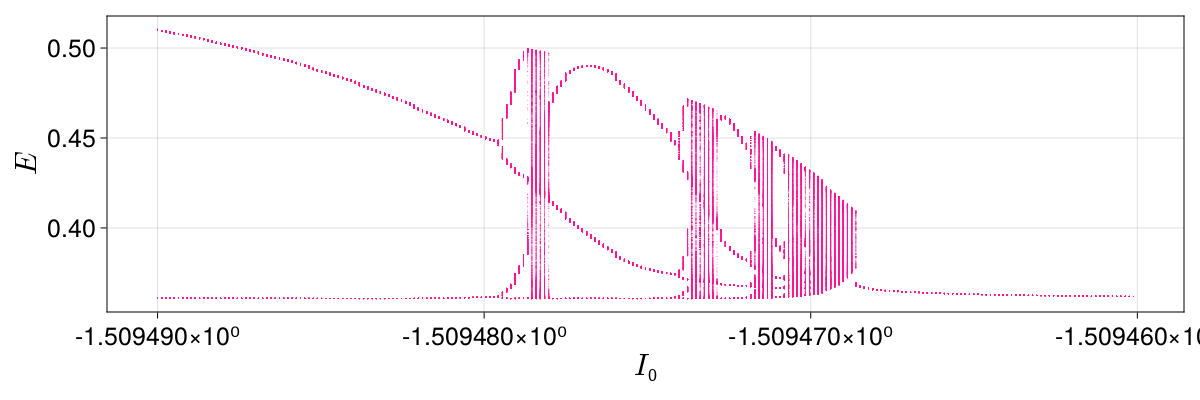

In [54]:
f = Figure(resolution = (1200, 400))
axis = Axis(f[1,1]; xlabel = L"I_0", ylabel = L"E", xlabelsize = 30, ylabelsize = 30,
            xticklabelsize = 25, yticklabelsize = 25)
for (j, p) in enumerate(I0range)
    scatter!(axis, fill(p, length(output[j])), output[j]; color = ("deeppink", 0.5), markersize = 1.0)
end
f

In [53]:
save("E_right_space_5000_dots.jld", "data", output)

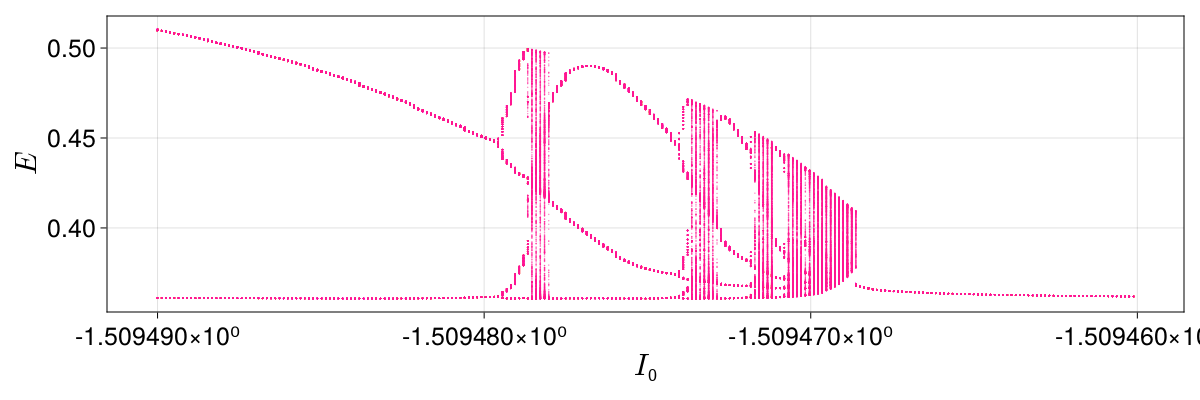

In [36]:
f = Figure(resolution = (1200, 400))
axis = Axis(f[1,1]; xlabel = L"I_0", ylabel = L"E", xlabelsize = 30, ylabelsize = 30,
            xticklabelsize = 25, yticklabelsize = 25)
for (j, p) in enumerate(I0range)
    scatter!(axis, fill(p, length(output[j])), output[j]; color = ("deeppink", 0.5), markersize = 1.5)
end
f